In [1]:
import os
import pathlib
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
from timeit import default_timer as timer

from LoadData import LoadData

import os
import sys
from datetime import datetime

import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics, svm
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.tree._tree import TREE_LEAF

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.utils import parallel_backend


TESTING = True
DECISION_TREE = False
SUPPORT_VECTOR = True
NEURAL_NET = False
K_NEAREST = False
BOOSTING = False
NORMALIZE_DATA = False
USE_PCA = True
DataSetName = "Fashion-MNIST"


In [ ]:
cwd = pathlib.Path().absolute()
training_data_path = "{}/fashion-mnist-train-data.csv".format(cwd)
testing_data_path = "{}/fashion-mnist-test-data.csv".format(cwd)

with parallel_backend('threading'):
    training_labels, training_data, _ = LoadData(training_data_path, normalize=NORMALIZE_DATA)
    testing_labels, testing_data, _ = LoadData(testing_data_path, normalize=NORMALIZE_DATA)

Scaler = StandardScaler().fit(training_data)
        
training_data = Scaler.transform(training_data)
testing_data = Scaler.transform(testing_data)


In [ ]:
"""
TRAINING TIME

"""

In [ ]:
# limit = 4000
# testing_subset = testing_data[:limit, :]
# training_subset = training_data[:limit, :]
# testing_sublabels = testing_labels[:limit]
# training_sublabels = training_labels[:limit ,]

solvers = ["Linear", "RBF"]
classifier_list = []

svm_linear_runtime = [0.0]
svm_linear_accuracy = [0.0]

svm_rbf_runtime = [0.0]
svm_rbf_accuracy = [0.0]

In [ ]:
with parallel_backend('threading'):
    for solver in solvers:
        clf = svm.SVC(kernel=solver.lower(), verbose=3, max_iter=1000)
        for i in range(1, 11, 1):
            print("{} - Training Size: {}%".format(solver, (i * 10)))
            start_time = timer()
            with parallel_backend('threading'):
                clf.fit(training_data[:int((60000 * (0.1 * i))), :], training_labels[:int((60000 * (0.1 * i)))])
            end_time = timer()
            if i == 10:
                classifier_list.append(clf)
            elapsed_time = end_time - start_time
            print(elapsed_time)
            if solver == "Linear":
                svm_linear_accuracy.append(clf.score(testing_data, testing_labels))
                svm_linear_runtime.append(elapsed_time)
            else:
                svm_rbf_accuracy.append(clf.score(testing_data, testing_labels))
                svm_rbf_runtime.append(elapsed_time)

In [ ]:
svm_linear_accuracy = np.asarray(svm_linear_accuracy)
svm_linear_runtime = np.asarray(svm_linear_runtime)
svm_rbf_accuracy = np.asarray(svm_rbf_accuracy)
svm_rbf_runtime = np.asarray(svm_rbf_runtime)

In [ ]:
svm_linear_accuracy.tofile('svm_linear_accuracy_{}.csv'.format(DataSetName),sep=',',format='%.3f')
svm_linear_runtime.tofile('svm_linear_runtime_{}.csv'.format(DataSetName),sep=',',format='%.3f')
svm_rbf_accuracy.tofile('svm_rbf_accuracy_{}.csv'.format(DataSetName),sep=',',format='%.3f')
svm_rbf_runtime.tofile('svm_rbf_runtime_{}.csv'.format(DataSetName),sep=',',format='%.3f')

In [ ]:
"""
GET Confusion Matrix

"""

In [ ]:
for i in range(len(classifier_list)):
    disp = plot_confusion_matrix(classifier_list[i], testing_data, testing_labels, values_format=".4g")
    disp.figure_.suptitle("{} Confusion Matrix".format(solvers[i]))
    print("TESTING")
    print(disp.confusion_matrix)
    plt.savefig("{}_ConfusionMatrix_{}.png".format(solvers[i], DataSetName))


In [ ]:
"""
PREDICTIONS

"""

In [ ]:
"""
Results

"""

In [2]:
colors = ["tab:orange", "tab:blue", "tab:green", "tab:red"]
solvers = ["Linear", "RBF"]
cwd = pathlib.Path().absolute()
run = np.loadtxt("{}/svm_rbf_runtime_Fashion-MNIST.csv".format(cwd), delimiter=",")
acc = np.loadtxt("{}/svm_rbf_accuracy_Fashion-MNIST.csv".format(cwd), delimiter=",")


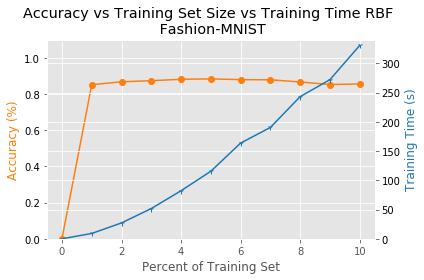

In [6]:
with plt.style.context('ggplot'):
    fig0, ax0 = plt.subplots()
    ax0.set_xlabel("Percent of Training Set")
    ax0.set_ylabel("Accuracy (%)", color='tab:orange')
    ax0.set_title("Accuracy vs Training Set Size vs Training Time {} \n {}".format("RBF", DataSetName))
    ax0.tick_params(axis='y', labelcolor="black")
    ax0.set_ylim(0, 1.1)
    ax3 = ax0.twinx()
    ax3.set_ylabel("Training Time (s)", color="tab:blue")
    ax3.set_ylim(0, max(run) + 10)
    ax3.tick_params(axis='y', labelcolor="black")
    for i in range(1):        
        ax0.plot([i for i in range(11)], acc, colors[i], marker='o', label="RBF")
        ax3.plot([i for i in range(11)], run, colors[i+1], marker="1", label="{} training-time".format("RBF"))
    fig0.tight_layout()
    dir = "{}/Training_{}_{}_Set_Size_Impact_vs_Training_Time.png".format(cwd, "RBF", DataSetName)
    plt.savefig(dir)
#         plt.close("all")